In [24]:
import torch
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import torch.nn as nn
from IPython.display import HTML

In [16]:

# exemplo função de custo (norma L2)
# quantas saídas?
# quantos casos de treinamento?

# saída esperada
y_true = torch.tensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]])

# saída da rede
y_pred = torch.tensor([[-2., -3., -4.],
                       [5., 7., 7.],
                       [8., 8., 10.],
                       [10., 12., 13.]])

loss_manual = ((y_true - y_pred)**2)# element-wise operation
print(loss_manual)
print(loss_manual.sum())
print(loss_manual.mean())

# https://docs.pytorch.org/docs/stable/generated/torch.nn.MSELoss.html
#loss_func = nn.MSELoss() # deafault : reduction = 'mean'
#loss_func = nn.MSELoss(reduction='none')
loss_func = nn.MSELoss(reduction='sum')
loss_pytorch = loss_func(y_true, y_pred)

print(loss_pytorch)


tensor([[ 9., 25., 49.],
        [ 1.,  4.,  1.],
        [ 1.,  0.,  1.],
        [ 0.,  1.,  1.]])
tensor(93.)
tensor(7.7500)
tensor(93.)


  Iter  1: Loss = 9.0000, w = 1.1200, Gradient = -12.0000
  Iter  5: Loss = 4.6190, w = 1.5114, Gradient = -8.5967
  Iter 10: Loss = 2.0064, w = 1.8484, Gradient = -5.6659
  Iter 15: Loss = 0.8716, w = 2.0706, Gradient = -3.7343
  Iter 20: Loss = 0.3786, w = 2.2170, Gradient = -2.4612
  Iter 25: Loss = 0.1645, w = 2.3135, Gradient = -1.6221
  Iter 30: Loss = 0.0714, w = 2.3771, Gradient = -1.0691
  Final estimated w after 30 iterations: 2.3771
  Iter  1: Loss = 9.0000, w = 1.6000, Gradient = -12.0000
  Iter  5: Loss = 0.1512, w = 2.3834, Gradient = -1.5552
  Iter 10: Loss = 0.0009, w = 2.4909, Gradient = -0.1209
  Iter 15: Loss = 0.0000, w = 2.4993, Gradient = -0.0094
  Iter 20: Loss = 0.0000, w = 2.4999, Gradient = -0.0007
  Iter 25: Loss = 0.0000, w = 2.5000, Gradient = -0.0001
  Iter 30: Loss = 0.0000, w = 2.5000, Gradient = -0.0000
  Final estimated w after 30 iterations: 2.5000
  Iter  1: Loss = 9.0000, w = 2.2000, Gradient = -12.0000
  Iter  5: Loss = 0.0000, w = 2.4995, Gradient

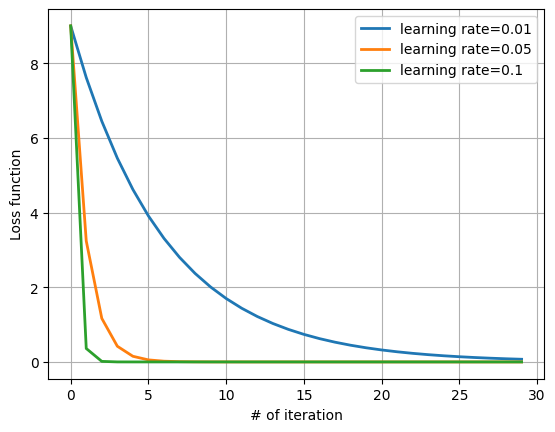

/tmp/ipython-input-3857426625.py:70: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(x,w_1*x,label='w 1',linewidth=2)
/tmp/ipython-input-3857426625.py:71: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(x,w_2*x,label='w 2',linewidth=2)
/tmp/ipython-input-3857426625.py:72: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  plt.plot(x,w_3*x,label='w 3',linewidth=2)


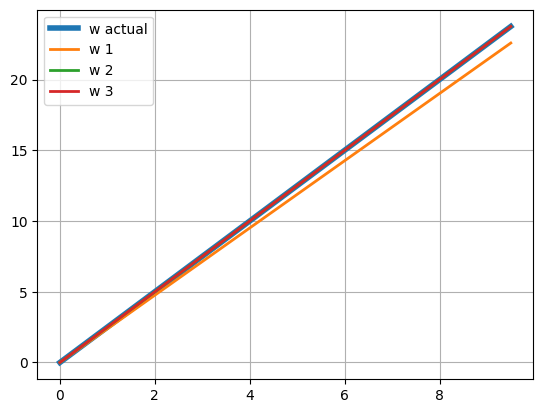

In [18]:
# exemplo de descida do gradiente, neurônio simples

def manual_gradient_descent_linear_regression(learning_rate = 0.1, num_iterations = 30):
    #print("--- Manual Gradient Descent for Linear Regression (Conceptual) ---")
    # y = w * x + b (we want to find w and b)
    # For simplicity, let's assume b=0, so y = w * x
    # Loss function: L = (y_pred - y_actual)^2 = (w * x - y_actual)^2
    # Gradient of L w.r.t w: dL/dw = 2 * (w * x - y_actual) * x

    # Sample data point (single)
    x_true = torch.tensor(2.0)
    y_true = torch.tensor(5.0) # True relationship is y = 2.5 * x

    # Initial guess for w
    w = torch.tensor(1.0, requires_grad=False) # Not using autograd here

    #print(f"  Target: y = 2.5 * x. True (x,y): ({x_true.item()}, {y_true.item()})")
    #print(f"  Initial w: {w.item():.4f}")

    loss_vec = []

    for i in range(num_iterations):
        # Forward pass: predict y
        y_pred = w * x_true

        # Calculate loss (MSE for one point)
        loss = (y_true - y_pred)**2
        loss_vec.append(loss)
        # Calculate gradient manually
        # dL/dw = - 2 * (y_true - y_pred) * x_true
        gradient_w = - 2 * (y_true - y_pred) * x_true

        # Update w
        w = w - learning_rate * gradient_w

        if (i + 1) % 5 == 0 or i == 0:
            print(f"  Iter {i+1:2d}: Loss = {loss.item():.4f}, w = {w.item():.4f}, Gradient = {gradient_w.item():.4f}")

    print(f"  Final estimated w after {num_iterations} iterations: {w.item():.4f}")
    return w, loss_vec

learning_rate1 = 0.01
learning_rate2 = 0.05
learning_rate3 = 0.10
#learning_rate4 = 0.15
#learning_rate5 = 0.25

num_iterations = 30

w_1, loss_1 = manual_gradient_descent_linear_regression(learning_rate=learning_rate1,num_iterations=num_iterations)
w_2, loss_2 = manual_gradient_descent_linear_regression(learning_rate=learning_rate2,num_iterations=num_iterations)
w_3, loss_3 = manual_gradient_descent_linear_regression(learning_rate=learning_rate3,num_iterations=num_iterations)
#w_4, loss_4 = manual_gradient_descent_linear_regression(learning_rate=learning_rate4,num_iterations=num_iterations)
#w_5, loss_5 = manual_gradient_descent_linear_regression(learning_rate=learning_rate5,num_iterations=num_iterations)

plt.plot(range(num_iterations),loss_1,label='learning rate='+str(learning_rate1),linewidth=2)
plt.plot(range(num_iterations),loss_2,label='learning rate='+str(learning_rate2),linewidth=2)
plt.plot(range(num_iterations),loss_3,label='learning rate='+str(learning_rate3),linewidth=2)
#plt.plot(range(num_iterations),loss_4,label='learning rate='+str(learning_rate4),linestyle='--',linewidth=2)
#plt.plot(range(num_iterations),loss_5,label='learning rate='+str(learning_rate5),linewidth=2)
plt.xlabel('# of iteration')
plt.ylabel('Loss function')
plt.grid(True)
plt.legend()
plt.show()

w_actual = 2.5
x = np.arange(0, 10, 0.5)
plt.plot(x,w_actual*x,label='w actual',linewidth=4)
plt.plot(x,w_1*x,label='w 1',linewidth=2)
plt.plot(x,w_2*x,label='w 2',linewidth=2)
plt.plot(x,w_3*x,label='w 3',linewidth=2)
#plt.plot(x,w_4*x,label='w 4',linewidth=2)
#plt.plot(x,w_5*x,label='w 5',linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Autograd demo, Example 1, simple funcion

# Create a tensor and set requires_grad=True to track computation
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
#print(x)
#print(x.item())
#print(y)

# https://amsword.medium.com/understanding-pytorchs-autograd-with-grad-fn-and-next-functions-b2c4836daa00
# Define a simple function
# L = (x*y) + (x^2)
c = x * y # not a leaf node
d = x**2  # not a leaf node
L = c + d

#print(L)
#print(L.grad_fn)
#print(type(L.grad_fn))

# Calling L.backward(), i.e., compute the derivatives
L.backward()

# Gradients are stored in .grad attribute
# dL/dx = y + 2x = 3 + 2*2 = 7
# dL/dy = x = 2

print(x.grad)
#print(x.grad.item())

print(y.grad)
#print(y.grad.item())
#print(y.is_leaf)

# only leaf tensoers have grad populated
print(c.grad)
#print(c.is_leaf)

tensor(7.)
tensor(2.)
None


/tmp/ipython-input-1006981646.py:36: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(c.grad)


In [65]:
# Autograd demo, Example 2, simple function + ReLU

x = torch.tensor(2.0, requires_grad=True)
#y = torch.tensor(3.0, requires_grad=True)
y = torch.tensor(-3.0, requires_grad=True)

#zero = torch.tensor(0., requires_grad=True)

c = x * y # not a leaf node
d = x**2  # not a leaf node
L = c + d
print(L.item())

#L2 = torch.sigmoid(L)
#L2 = max(zero,L)
# https://docs.pytorch.org/docs/stable/generated/torch.clamp.html
L2 = torch.clamp(L,min=0) # applying ReLU for the autograd to work
L2.backward()

print(x.grad)
print(y.grad)

-2.0
tensor(0.)
tensor(0.)


In [102]:
# Autograd demo, Example 3, simple net

x = torch.tensor([0.5, 1.0, -0.2], requires_grad=True)      # Inputs (e.g., 3 features for one sample)
A = torch.tensor([[0.7, -0.3, 0.1],                         # Weights for neuron 1 (from a previous training)
                  [0.2,  0.4, -0.5]], requires_grad=True)   # Weights for neuron 2 (from a previous training)
b = torch.tensor([0.1, -0.2], requires_grad=True)           # Biases for 2 neurons
z = torch.mv(A, x) + b                                      # Weighted sum: z = Wx + b

A2 = torch.tensor([1.0, 1.0], requires_grad=True)
#print(z)
L = torch.matmul(A2,z)
#print(L)

L.backward()

#print(A.grad)
#print(b.grad)
#print(A2.grad)

  Epoch [  1/60], Loss: 8.3908, w: 1.6203, b: -0.2665
  Epoch [ 20/60], Loss: 0.3055, w: 2.3244, b: -0.0279
  Epoch [ 40/60], Loss: 0.0095, w: 2.4616, b: 0.0178
  Epoch [ 60/60], Loss: 0.0004, w: 2.4858, b: 0.0251

  Final estimated w: 2.4858, Final estimated b: 0.0251
  (Compare w to 2.5 and b to 0.0)


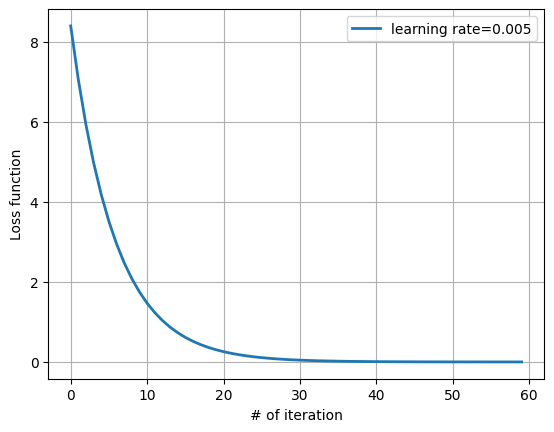

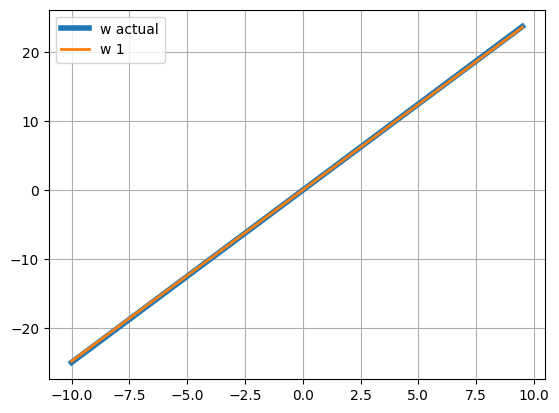

In [25]:
def autograd_gradient_descent_linear_regression(learning_rate = 0.01, num_epochs = 100):
    # Same linear regression problem: y = w * x + b
    # We want to find w and b that minimize loss for given (x, y) pairs.

    # Sample data (multiple points)
    X_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])  # Input features
    Y_train = torch.tensor([[2.5], [5.0], [7.5], [10.0]]) # Target values (y = 2.5*x)

    # Model parameters (initialize with requires_grad=True to track gradients)
    torch.manual_seed(0)
    w = torch.randn(1, 1, requires_grad=True) # Weight
    b = torch.randn(1, 1, requires_grad=True) # Bias

    #print(f"  Target relationship: y = 2.5*x")
    #print(f"  Initial w: {w.item():.4f}, Initial b: {b.item():.4f}")

    loss_vec = []

    for epoch in range(num_epochs):
        # Forward pass: Compute predicted y
        y_pred = X_train @ w + b # Using matrix multiplication for multiple samples
        #print(y_pred)
        #import sys
        #sys.exit('exit')
        # Compute loss (Mean Squared Error)
        loss = torch.mean((y_pred - Y_train)**2)
        loss_vec.append(loss.detach().numpy())

        # Backward pass: Compute gradients using autograd
        # Before the backward pass, zero all of the gradients for variables
        # w.grad and b.grad will be None for the first iteration
        if w.grad is not None:
            w.grad.zero_()
        if b.grad is not None:
            b.grad.zero_()

        loss.backward() # PyTorch computes d(loss)/dw and d(loss)/db automatically

        # Update weights (manually, using torch.no_grad() to prevent tracking this in autograd)
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

        if (epoch + 1) % 20 == 0 or epoch == 0:
            print(f"  Epoch [{epoch+1:3d}/{num_epochs}], Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}")

    print(f"\n  Final estimated w: {w.item():.4f}, Final estimated b: {b.item():.4f}")
    print(f"  (Compare w to 2.5 and b to 0.0)")

    return w, b, loss_vec

num_epochs = 60

learning_rate1 = 0.005
#learning_rate2 = 0.01
#learning_rate3 = 0.02
#learning_rate4 = 0.05
w_1, b_1, loss_1 = autograd_gradient_descent_linear_regression(learning_rate=learning_rate1,num_epochs=num_epochs)
#w_2, b_2, loss_2 = autograd_gradient_descent_linear_regression(learning_rate=learning_rate2,num_epochs=num_epochs)
#w_3, b_3, loss_3 = autograd_gradient_descent_linear_regression(learning_rate=learning_rate3,num_epochs=num_epochs)
#w_4, b_4, loss_4 = autograd_gradient_descent_linear_regression(learning_rate=learning_rate4,num_epochs=num_epochs)

plt.plot(range(num_epochs),loss_1,label='learning rate='+str(learning_rate1),linewidth=2)
#plt.plot(range(num_epochs),loss_2,label='learning rate='+str(learning_rate2),linewidth=2)
#plt.plot(range(num_epochs),loss_3,label='learning rate='+str(learning_rate3),linewidth=2)
#plt.plot(range(num_epochs),loss_4,label='learning rate='+str(learning_rate4),linewidth=2)
plt.xlabel('# of iteration')
plt.ylabel('Loss function')
plt.grid(True)
plt.legend()
plt.show()

w_1, b_1 = w_1.detach().numpy(), b_1.detach().numpy()
#w_2, b_2 = w_2.detach().numpy(), b_2.detach().numpy()
#w_3, b_3 = w_3.detach().numpy(), b_3.detach().numpy()
#w_4, b_4 = w_4.detach().numpy(), b_4.detach().numpy()

#print(w_1[0])
#print(w_1[0]*x+b_1[0])
#print(w_4[0]*x+b_4[0])

w_actual = 2.5
b_actual = 0
x = np.arange(-10, 10, 0.5)
plt.plot(x,w_actual*x+b_actual,label='w actual',linewidth=4)
plt.plot(x,w_1[0]*x+b_1[0],label='w 1',linewidth=2)
#plt.plot(x,w_2[0]*x+b_2[0],label='w 2',linewidth=2)
#plt.plot(x,w_3[0]*x+b_3[0],label='w 3',linewidth=2)
#plt.plot(x,w_4[0]*x+b_4[0],label='w 4',linewidth=2)
plt.grid(True)
plt.legend()
plt.show()

In [95]:
def autograd_gradient_descent_linear_regression_example_2(learning_rate = 0.01, num_epochs = 100):
    print("\n--- PyTorch Autograd for Automatic Differentiation ---")
    # Same linear regression problem: y = w * x + b
    # We want to find w and b that minimize loss for given (x, y) pairs.

    # Sample data (multiple points)
    X_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])  # Input features
    Y_train = torch.tensor([[2.0], [5.0], [10.0], [17.0]]) # Target values (y = x^2 + 1)

    # Model parameters (initialize with requires_grad=True to track gradients)
    torch.manual_seed(0)
    w = torch.randn(1, 1, requires_grad=True) # Weight
    b = torch.randn(1, 1, requires_grad=True) # Bias

    print(f"  Target relationship: y = x^2 + 1")
    print(f"  Initial w: {w.item():.4f}, Initial b: {b.item():.4f}")

    loss_vec = []
    w_vec = [w.item()]
    b_vec = [b.item()]

    for epoch in range(num_epochs):
        # Forward pass: Compute predicted y
        y_pred = X_train @ w + b # Using matrix multiplication for multiple samples

        # Compute loss (Mean Squared Error)
        loss = torch.mean((y_pred - Y_train)**2)
        loss_vec.append(loss.detach().numpy())

        # Backward pass: Compute gradients using autograd
        # Before the backward pass, zero all of the gradients for variables
        # w.grad and b.grad will be None for the first iteration
        if w.grad is not None:
            w.grad.zero_()
        if b.grad is not None:
            b.grad.zero_()

        loss.backward() # PyTorch computes d(loss)/dw and d(loss)/db automatically

        # Update weights (manually, using torch.no_grad() to prevent tracking this in autograd)
        with torch.no_grad():
            w -= learning_rate * w.grad
            b -= learning_rate * b.grad

        w_vec.append(w.item())
        b_vec.append(b.item())

        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f"  Epoch [{epoch+1:3d}/{num_epochs}], Loss: {loss.item():.4f}, w: {w.item():.4f}, b: {b.item():.4f}")

    print(f"\n  Final estimated w: {w.item():.4f}, Final estimated b: {b.item():.4f}")
    print(f"  (Compare w to 2.5 and b to 0.0)")

    return w_vec, b_vec, loss_vec

num_epochs = 200+1

learning_rate1 = 0.01
w_1, b_1, loss_1 = autograd_gradient_descent_linear_regression_example_2(learning_rate=learning_rate1,num_epochs=num_epochs)

learning_rate2 = 0.05
w_2, b_2, loss_2 = autograd_gradient_descent_linear_regression_example_2(learning_rate=learning_rate2,num_epochs=num_epochs)

# comparison to numpy polyfit
coef = np.polyfit([1,2,3,4],[2,5,10,17],1)
print(coef[0])
print(coef[1])

w_actual = 1
b_actual = 1
x = np.arange(1, 4, 0.05)

#plt.plot(x,w_actual*x*x+b_actual,label='f actual',linewidth=4)
#plt.plot(x,w_1[-1]*x+b_1[-1],label='w 1',linewidth=3)
#plt.plot(x,coef[0]*x+coef[1],label='np polyfit',linewidth=2,linestyle='--')
#plt.grid(True)
#plt.legend()
#plt.show()

fig, ax = plt.subplots()
line1 = ax.plot(x,w_actual*x*x+b_actual,label='f actual',linewidth=4)[0]
line2 = ax.plot(x,w_1[0]*x+b_1[0],label='w='+str(learning_rate1)+', epoch='+str(0),linewidth=2)[0]
line3 = ax.plot(x,w_2[0]*x+b_2[0],label='w='+str(learning_rate2)+', epoch='+str(0),linewidth=2)[0]
line4 = ax.plot(x,coef[0]*x+coef[1],label='np polyfit',linewidth=2,linestyle='--')[0]
ax.set(xlim=[0, 5], ylim=[0, 20], xlabel='x', ylabel='y')
plt.grid(True)
ax.legend()

def update(frame):
    # for each frame, update the data stored on each artist.
    y = z[:frame]
    # update the line plot:
    line2.set_ydata(w_1[frame]*x+b_1[frame])
    line2.set_label('w='+str(learning_rate1)+', epoch='+str(frame))
    line3.set_ydata(w_2[frame]*x+b_2[frame])
    line3.set_label('w='+str(learning_rate2)+', epoch='+str(frame))
    ax.legend()
    return (line1, line2, line3, line4)

#for i in range(num_epochs):
#  if (i + 1) % 100 == 0 or i == 0:
#    line.set_data(x, w_1[i]*x+b_1[i])
#    plt.pause(0.05)
#    plt.show()

#plt.plot(x,w_actual*x*x+b_actual,label='f actual',linewidth=4)
#plt.plot(x,w_1[-1]*x+b_1[-1],label='w 1',linewidth=3)
#plt.plot(x,coef[0]*x+coef[1],label='np polyfit',linewidth=2,linestyle='--')
#plt.grid(True)
#plt.legend()

ani = animation.FuncAnimation(fig=fig, func=update, frames=num_epochs, interval=30, blit=True)
HTML(ani.to_jshtml())
#plt.show()

Output hidden; open in https://colab.research.google.com to view.


--- PyTorch Autograd for Automatic Differentiation - SIMPLE NET ---
  Epoch [  1/1001], Loss: 437.8263
  Epoch [100/1001], Loss: 1.6295
  Epoch [200/1001], Loss: 1.3456
  Epoch [300/1001], Loss: 1.1897
  Epoch [400/1001], Loss: 1.1042
  Epoch [500/1001], Loss: 1.0572
  Epoch [600/1001], Loss: 1.0314
  Epoch [700/1001], Loss: 1.0172
  Epoch [800/1001], Loss: 1.0095
  Epoch [900/1001], Loss: 1.0052
  Epoch [1000/1001], Loss: 1.0029


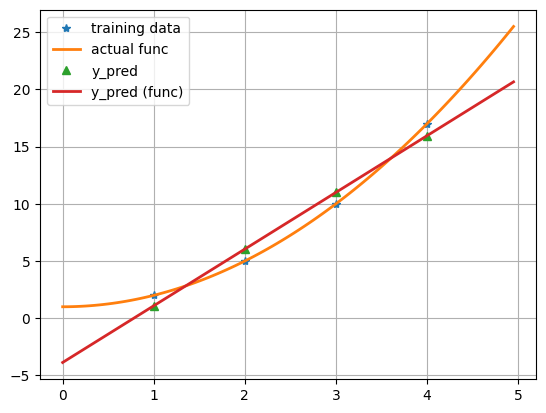

In [ ]:
from re import X
def autograd_gradient_descent_linear_regression_example_3(learning_rate = 0.01, num_epochs = 100, number_neurons_hidden_layer=5):
    print("\n--- PyTorch Autograd for Automatic Differentiation - SIMPLE NET ---")

    # Sample data (multiple points)
    X_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])  # Input features
    Y_train = torch.tensor([[2.0], [5.0], [10.0], [17.0]]) # Target values (y = x^2 + 1)

    #print(X_train)
    X_train = torch.transpose(X_train, 0, 1)
    Y_train = torch.transpose(Y_train, 0, 1)
    #print(X_train)

    # Model parameters (initialize with requires_grad=True to track gradients)
    torch.manual_seed(0)
    #w = torch.randn(1, 1, requires_grad=True) # Weight
    A1 = torch.randn(number_neurons_hidden_layer, 1, requires_grad=True) # Weight
    b1 = torch.randn(number_neurons_hidden_layer, 1, requires_grad=True) # Bias
    A2 = torch.ones(1, number_neurons_hidden_layer, requires_grad=True) # Weight

    #print("inital A and b:")
    #print(A1)
    #print(b1)

    loss_vec = []

    for epoch in range(num_epochs):
        # Forward pass: Compute predicted y
        y1 = torch.mm(A1,X_train) + b1 # Using matrix multiplication for multiple samples
        #y1 = torch.clamp(torch.mm(A1,X_train) + b1, min=0) # Using matrix multiplication for multiple samples
        #y1 = torch.sigmoid(torch.mm(A1,X_train) + b1) # Using matrix multiplication for multiple samples
        #print(y1)

        y_pred = torch.mm(A2,y1)
        #y_pred = torch.sigmoid(torch.mm(A2,y1))
        #print(y_pred)
        import sys
        #sys.exit('exit')

        # Compute loss (Mean Squared Error)
        #print(y_pred)
        #print(Y_train)
        loss = torch.mean((y_pred - Y_train)**2)
        #print(y_pred - Y_train)
        #print((y_pred - Y_train)**2)
        #print(loss)
        #sys.exit("exit")
        loss_vec.append(loss.detach().numpy())

        # Backward pass: Compute gradients using autograd
        # Before the backward pass, zero all of the gradients for variables
        # w.grad and b.grad will be None for the first iteration
        if A1.grad is not None:
            A1.grad.zero_()
        if b1.grad is not None:
            b1.grad.zero_()

        loss.backward() # PyTorch computes d(loss)/dw and d(loss)/db automatically
        #print(A1.grad)
        #print(b1.grad)

        # Update weights (manually, using torch.no_grad() to prevent tracking this in autograd)
        with torch.no_grad():
            A1 -= learning_rate * A1.grad
            b1 -= learning_rate * b1.grad

        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f"  Epoch [{epoch+1:3d}/{num_epochs}], Loss: {loss.item():.4f}")

    #print(f"\n  Final estimated w: {w.item():.4f}, Final estimated b: {b.item():.4f}")
    #print(f"  (Compare w to 2.5 and b to 0.0)")

    return loss_vec, A1, b1, A2

num_epochs = 1000+1
number_neurons_hidden_layer = 10
learning_rate1 = 0.001
loss_1, A1, b1, A2 = autograd_gradient_descent_linear_regression_example_3(learning_rate=learning_rate1,num_epochs=num_epochs, number_neurons_hidden_layer=number_neurons_hidden_layer)


X_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])  # Input features
X_train = torch.transpose(X_train, 0, 1)
Y_train = torch.tensor([[2.0], [5.0], [10.0], [17.0]])

y1 = torch.mm(A1,X_train) + b1
#y1 = torch.clamp(torch.mm(A1,X_train) + b1, min=0) # Using matrix multiplication for multiple samples
#y1 = torch.sigmoid(torch.mm(A1,X_train) + b1) # Using matrix multiplication for multiple samples
y_pred = torch.mm(A2,y1)
#y_pred = torch.sigmoid(torch.mm(A2,y1))

# only to plot
X_train = torch.squeeze(X_train)
Y_train = torch.squeeze(Y_train)
y_pred  = torch.squeeze(y_pred)

x = np.arange(0, 5, 0.05)

x_func  = torch.tensor(x,dtype=torch.float32)
x_func  = torch.unsqueeze(x_func, 1)
x_func  = torch.transpose(x_func, 0, 1)
#print(x_func.dtype)
#print(A1.size())
y1_func     = torch.mm(A1,x_func) + b1
#y1_func     = torch.clamp(torch.mm(A1,x_func) + b1,min=0.)
#y1_func     = torch.sigmoid(torch.mm(A1,x_func) + b1)
y_pred_func = torch.mm(A2,y1_func)
#y_pred_func = torch.sigmoid(torch.mm(A2,y1_func))

y_pred_func = torch.squeeze(y_pred_func)
x_func      = torch.squeeze(x_func)

plt.plot(X_train.detach().numpy(),Y_train.detach().numpy(),'*',label='training data')
plt.plot(x,x*x+1,label='actual func',linewidth=2)
plt.plot(X_train.detach().numpy(),y_pred.detach().numpy(),'^',label='y_pred',linewidth=2)
plt.plot(x_func.detach().numpy(),y_pred_func.detach().numpy(),label='y_pred (func)',linewidth=2)
plt.grid(True)
plt.legend()
plt.show()



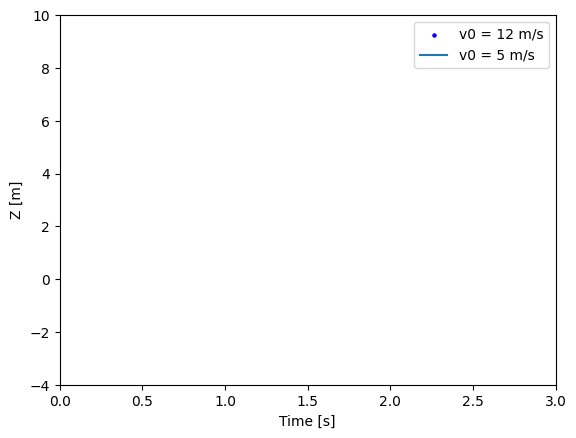

In [96]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)
HTML(ani.to_jshtml())
#plt.show()

In [ ]:
import torch.nn as nn

# Example: Define a simple model and loss
model = nn.Linear(10, 1)
relu = nn.ReLU()
input_tensor = torch.randn(1, 10)
target_tensor = torch.randn(1, 1)

# Forward pass
output = model(input_tensor)
activated_output = relu(output) # Applying ReLU

loss = nn.MSELoss()(activated_output, target_tensor)

# Correct: Call backward on the loss tensor
loss.backward()